# 회귀분석 과제: Air Quality 
- UCI에서 가져온 Air Quality 데이터    
-  https://archive.ics.uci.edu/ml/datasets/Air+Quality#    
    
        

### 제공된 전반적인 정보    
- null 값들은 임의로 -200으로 채워둠
- 이탈리아의 도시에서 측정된 데이터이며, 심각하게 오염된 위치에서 측정된 데이터들
- 다양한 대기오염 물질들의 농도를 측정하였고, 해당 농도를 측정할 때 사용된 센서의 응답률도 존재
- 어떤 것을 예측해야 하는지 아직은 모르는 상황

In [1]:
import pandas as pd

# 데이터 불러오기
# csv 파일에서는 데이터가 콤마로 구분되지 않고 세미콜론으로 구분되어있었음. 
# csv파일과 xlsx 파일을 각각 불러왔을 때 불러온 형태의 차이가 있어 깔끔한 xlsx 파일을 이용

# air_quality_csv = pd.read_csv("./AirQualityUci.csv", sep=';')
air_quality = pd.read_excel("./AirQualityUci.xlsx")

# print(air_quality_csv)
# print(air_quality)
air_quality

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


### 데이터 column 정보
* 출처: https://archive.ics.uci.edu/ml/datasets/Air+Quality#

0 Date (DD/MM/YYYY)    
: 일월년     
    
1 Time (HH.MM.SS)  
: 시분초    
    
2 CO(GT) - True hourly averaged concentration CO in mg/m^3 (reference analyzer)    
: 일산화탄소의 시간당 농도로 단위는 mg/m^3    
     
3 PT08.S1(CO) - PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)    
: 주로 일산화 탄소를 감지할 때 쓰는 센서의 시간당 평균 응답률    

4 NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)    
: 비메탄 탄화수소의 시간당 평균 농도로 단위는 microg/m^3      

5 C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)    
: 벤젠의 시간당 평균 농도로 단위는 microg/m^3    

6 PT08.S2(NMHC) - PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)    
: NMHC를 타겟으로 한 센서의 시간당 평균 응답률    

7 NOx(GT) - True hourly averaged NOx concentration in ppb (reference analyzer)    
: 질소산화물의 시간당 평균 농도로 단위는 ppb    

8 PT08.S3(NOx) - PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)    
: 질소산화물을 타겟으로 한 센서의 시간당 평균 응답률    

9 NO2(GT) - True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)    
: 이산화질소의 시간당 평균 농도로 단위는 microg/m^3    

10 PT08.S4(NO2) - PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)    
: 이산화질소를 타겟으로 한 센서의 시간당 평균 응답률    

11 PT08.S5(O3) - PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)    
: 오존을 타겟으로 한 센서의 시간당 평균 응답률    

12 T - Temperature in Â°C    
: 측정된 섭씨 온도    

13 RH - Relative Humidity (%)      
: 상대 습도    

14 AH - Absolute Humidity     
: 절대 습도    

## 1차 문제정의 및 EDA
- 전반적으로 데이터를 보고 column 정보를 정리해본 결과 우리가 예측해야 하는 것은 오존의 농도인 것으로 추정됨
- 대기 오염물질들과 오존 농도간의 상관관계도 파악해봐야 할 것 같음. 

In [2]:
# dataset 구조 확인
air_quality.shape

(9357, 15)

In [3]:
# null값이 없으며, date와 time을 제외하고는 모두 수치형임
# date, time을 제외하고 시각화를 해보면 좋을 듯 함
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [4]:
# 데이터 내의 null 값들은 -200으로 처리해주었으나, 비어있는 값이 있을 수 있으니 확인해줌
air_quality.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [5]:
# 전반적인 기초통계량을 확인해봄
## 일산화탄소 농도가 음수값이 나온 것으로 봤을 때 null값(-200)이 많이 존재하는 것으로 파악됨
## 각 time과 date를 제외한 각 column들은 null값(-200)이 모두 존재함
## 특히 NMHC의 경우에는 평균값이 거의 -200에 가까운 형태를 띄고있음
## -200을 어떻게 처리해주는지가 관건일 듯함
air_quality.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 각 column별 관계를 알아보기 위해 column이름들을 뽑음
air_quality.columns

# column들 중 날짜를 제외하고 시각화 -> 날짜들의 경우에는 2004년부터 2005년까지 1시간 간격의 시계열임
cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

C:\Users\1ayou\AppData\Local\Temp\ipykernel_8732\1708815338.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  air_quality[cols].hist(ax=ax)


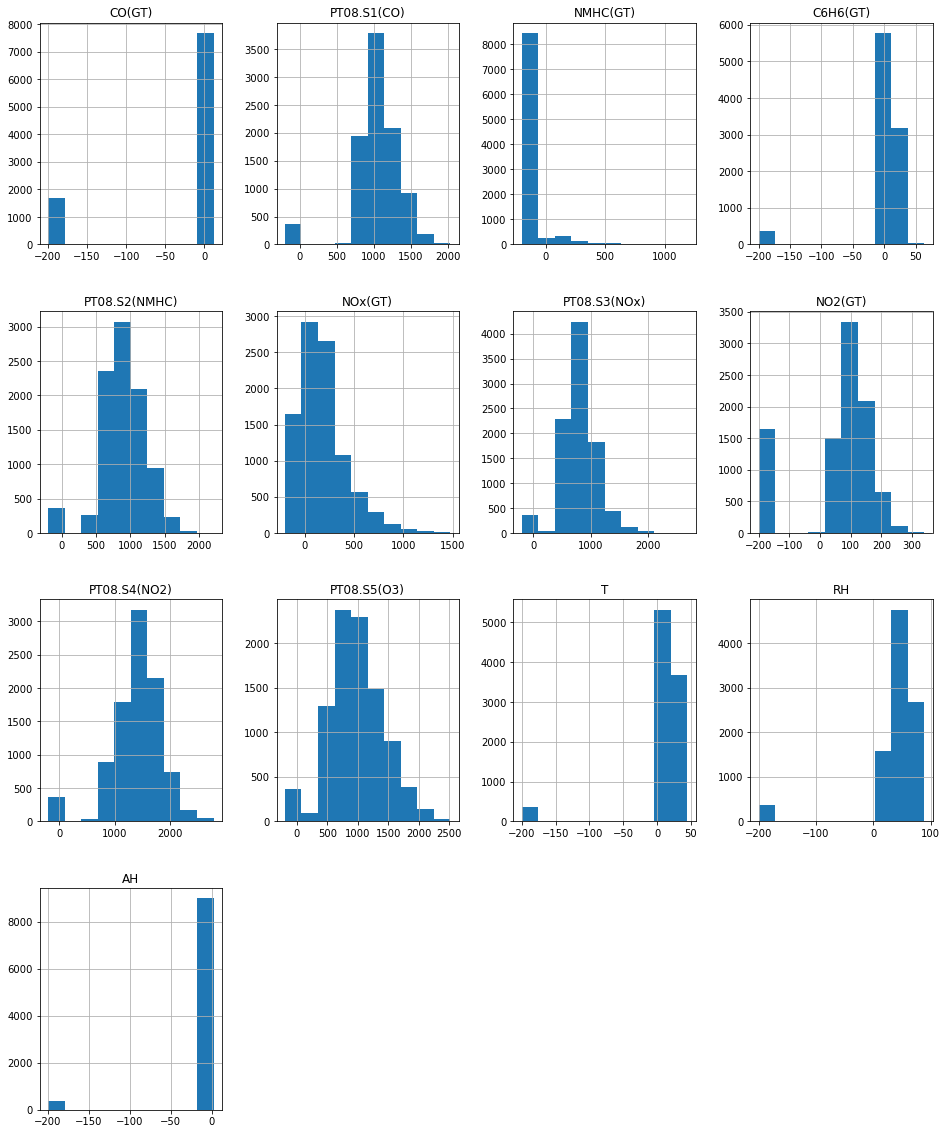

In [7]:
# 각 변수들의 분포를 알아봄
# 각 column별로 -200 값이 어느정도인지 정확하게 파악할 필요가 있을 듯 함
fig = plt.figure(figsize = (16, 20))
ax = fig.gca()

air_quality[cols].hist(ax=ax)
plt.show()

In [8]:
# 각 column별로 갯수들을 확인해본 결과 null값이 1000개 이상인 경우가 존재: PT08.S1(CO), CO(GT), NOx(GT), NO2(GT)
# 해당 부분을 어떻게 처리할 것인가?
# 단순히 0으로 채워 넣을 것인가? 혹은 평균치나 기타 값으로 채울 것인가?
for col in cols:
    print(air_quality[col].value_counts())

-200.0    1683
 1.0       305
 1.4       279
 1.6       275
 1.5       273
          ... 
 9.9         1
 7.6         1
 9.3         1
 7.0         1
 8.5         1
Name: CO(GT), Length: 97, dtype: int64
-200.000000     366
 1099.500000     12
 954.250000      12
 986.750000      12
 888.000000      11
               ... 
 808.000000       1
 834.333333       1
 891.666667       1
 748.500000       1
 1314.250000      1
Name: PT08.S1(CO), Length: 3246, dtype: int64
-200    8443
 66       14
 40        9
 29        9
 88        8
        ... 
 422       1
 424       1
 339       1
 445       1
 307       1
Name: NMHC(GT), Length: 430, dtype: int64
-200.000000    366
 6.849892       13
 10.184263       9
 5.560496        9
 4.045717        9
              ... 
 26.798408       1
 18.833976       1
 21.837693       1
 21.275833       1
 1.307608        1
Name: C6H6(GT), Length: 3773, dtype: int64
-200.000000     366
 850.250000      13
 984.500000       9
 791.000000       9
 713.250000  

<AxesSubplot:>

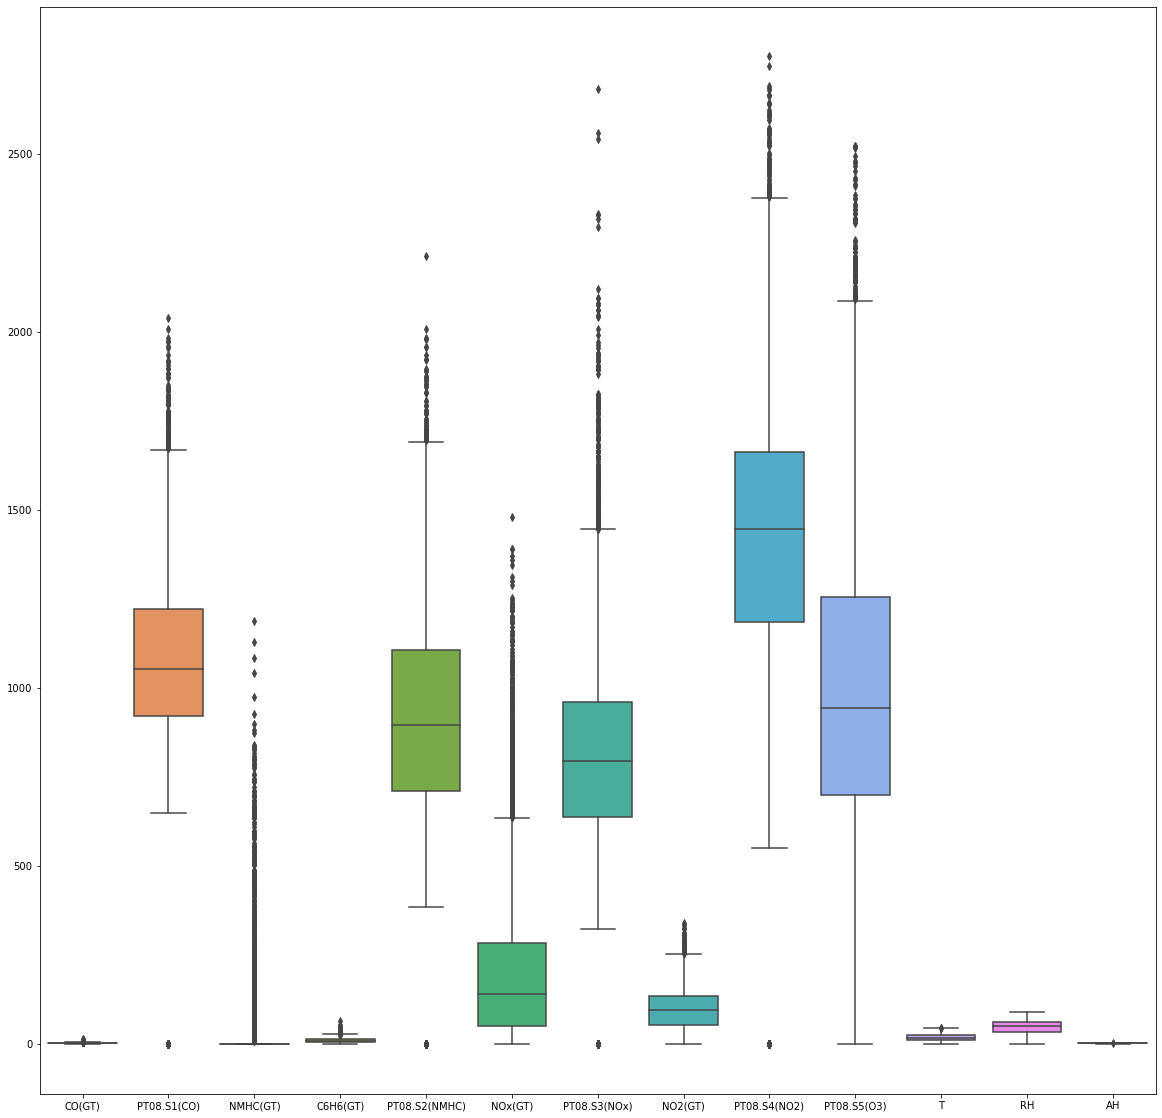

In [9]:
# 데이터의 분포를 박스플롯을 이용해서 또 확인
# 분포 확인시 극단값으로 인해 분포를 보는데 어려움이 있을 것 같아 -200의 값을 임의로 0으로 설정
air_quality_re0 = air_quality.replace(-200, 0)

# for col in cols:
#     print(air_quality_re0[col].value_counts())

# 센서의 응답률 데이터들은 농도 데이터보다 큰 값을 가짐
# 생각해보니 오존의 농도 데이터는 존재하지 않고, 오존의 농도를 측정한 센서의 응답률만 존재함
# 예측해야 하는 값이 없는데 어떻게 예측을 하는가?
# 오존의 농도는 굉장히 작은 값을 유지해야 함 -> 높아질 수록 좋지 않은 형태이며, 단위는 ppm
fig = plt.figure(figsize = (20, 20))
sns.boxplot(data=air_quality_re0)

## 발생한 문제 및 EDA
- 기존에는 오존의 농도를 예측하려고 했으나 주어진 데이터에는 오존 농도 측정 센서의 응답률만 존재함
- 이를 예측하는 것은 의미가 없다고 판단하여, 다른 농도 데이터를 예측해야 함
- 어떤 변수를 y값으로 삼아야 할지 변수들간의 상관관계를 확인

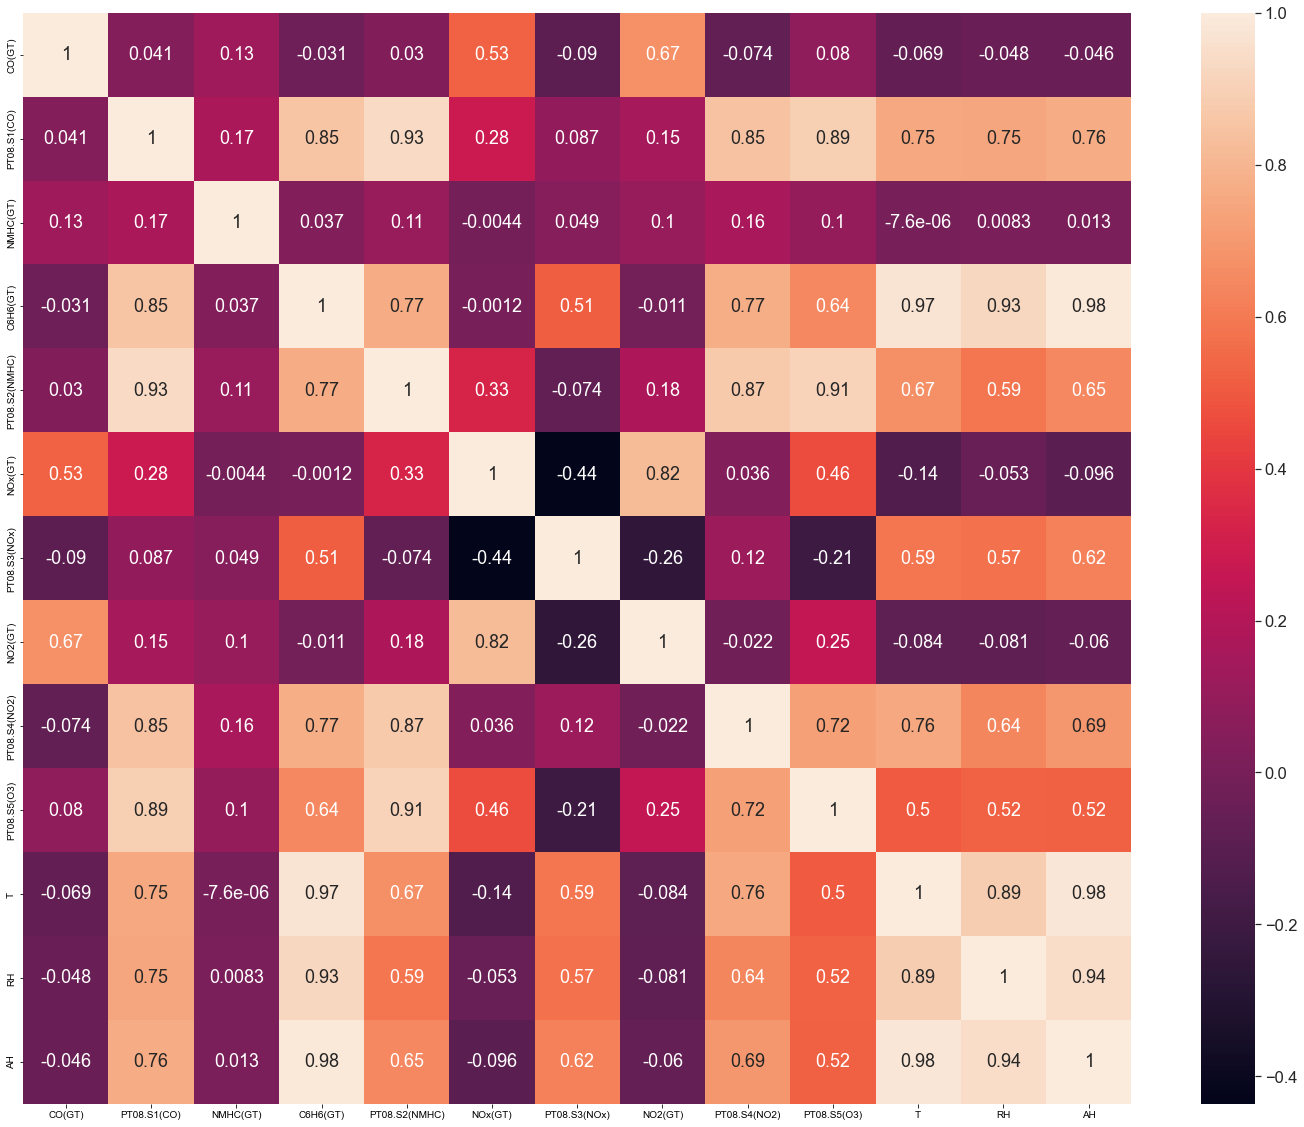

In [10]:
# heatmap 시각화
# 센서 응답률들이 온습도와 꽤 관계가 있는 것으로 나타남
# 센서 응답률간의 관계 또한 양의 상관관계를 꽤 보임
corr = air_quality[cols].corr(method = 'pearson')

fig = plt.figure(figsize = (20, 16))
ax = fig.gca()

sns.set(font_scale = 1.5)  # font size
heatmap = sns.heatmap(corr.values, annot=True, yticklabels = cols, xticklabels = cols, ax=ax)
plt.tight_layout() # 여백
plt.show()

## 2차 문제 정의 및 전처리, 모델링
- 센서의 응답률은 예측을 위한 피쳐로 사용하는 것이 아니라고 생각됨
- 농도 데이터들 중 다른 변수들과 상관관계가 높은 피쳐를 y값으로 사용하려고 함

### 문제정의
### : 일산화탄소, 이산화질소, 질소산화물 농도와 센서 응답률 통한 벤젠 농도 예측하기
- 벤젠 농도 예측으로 정한 이유는 다음과 같음
    - 다른 피쳐들과의 상관관계가 높음 
    - 결측치가 다른 변수들에 비해 적은 편임

In [11]:
# 결측치가 어떻게 영향을 미칠지, 어떻게 처리할지 아직 감이 오지 않아 우선적으로는 0으로 처리된 데이터를 이용
# 센서 응답률의 경우 농도에 비해 수치가 크기 때문에 정규화가 필요함

# 정규화 진행
# Log 변환을 통해 센서 응답률들을 정규화, 0~1 사이의 값을 가질 필요는 없기 때문에 log 변환 이용
import numpy as np

sensor_cols = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
scaled_aq = air_quality_re0

for i in sensor_cols:
    scaled_aq.loc[:, i] = np.log1p(scaled_aq.loc[:, i])
    
# scaled_aq

In [12]:
# X, y 분리하기
from sklearn.model_selection import train_test_split

x_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','NOx(GT)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

X = scaled_aq.loc[:, x_cols]
y = scaled_aq.loc[:, 'C6H6(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
# 회귀 분석을 할 때 주의할 점은 다중공선성이다. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['features'] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1) 


,features,VIF Factor
0,CO(GT),10.5
1,PT08.S1(CO),7082.4
2,NMHC(GT),1.5
3,NOx(GT),11.4
4,PT08.S2(NMHC),9200.6
5,PT08.S3(NOx),1058.1
6,NO2(GT),11.5
7,PT08.S4(NO2),9667.7
8,PT08.S5(O3),2185.4
9,T,82.8


In [14]:
# 확인 결과 심각하게 문제가 있다. 
# 농도별로 다중공선성을 모두 확인해봐야겠다.

def vif(y_col_candidate):
    for y_col_can in y_col_candidate:
        
        cols = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NMHC(GT)', 
               'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
               'PT08.S5(O3)', 'T', 'RH', 'AH']
        
        cols.remove(y_col_can)
        
        X = scaled_aq.loc[:, cols]
        vif_df = pd.DataFrame()
        vif_df['features'] = X.columns
        vif_df["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print("--------%s--------" %(y_col_can))
        print(vif_df.round(1))
        
vif(['CO(GT)', 'C6H6(GT)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)'])

--------CO(GT)--------
         features  VIF Factor
0     PT08.S1(CO)      7273.3
1        C6H6(GT)        24.3
2        NMHC(GT)         1.3
3   PT08.S2(NMHC)     10050.0
4         NOx(GT)         9.2
5    PT08.S3(NOx)      2138.3
6         NO2(GT)        11.9
7    PT08.S4(NO2)     10495.5
8     PT08.S5(O3)      2251.8
9               T        83.5
10             RH        80.7
11             AH        71.2
--------C6H6(GT)--------
         features  VIF Factor
0          CO(GT)        10.6
1     PT08.S1(CO)      7041.4
2        NMHC(GT)         1.4
3   PT08.S2(NMHC)      9215.3
4         NOx(GT)        11.3
5    PT08.S3(NOx)      1061.6
6         NO2(GT)        11.5
7    PT08.S4(NO2)      9530.2
8     PT08.S5(O3)      2195.7
9               T        81.5
10             RH        78.3
11             AH        70.4
--------NMHC(GT)--------
         features  VIF Factor
0          CO(GT)        10.4
1     PT08.S1(CO)      7209.9
2        C6H6(GT)        26.1
3   PT08.S2(NMHC)      9745

In [15]:
# 확인 결과 모두 심각한 상태이다.
# 전반적으로 유사한 다중공선성을 보이기 때문에 무시하고, 모델링을 진행해본다.
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

lr_reg = LinearRegression()

lr_train = lr_reg.fit(X_train, y_train)

train_pred = lr_reg.predict(X_train)
pred = lr_train.predict(X_test)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     4894.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:25:06   Log-Likelihood:                -15065.
No. Observations:                6549   AIC:                         3.016e+04
Df Residuals:                    6536   BIC:                         3.024e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9946      0.173     -5.752

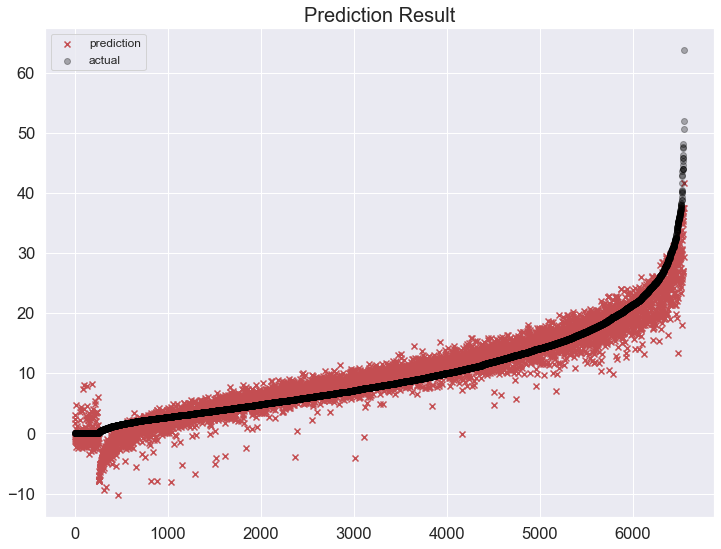

---------R square---------
0.8998527616786706
---------MSE---------
5.8287143138445865
---------RMSE---------
2.4142730404501864
---------actual vs predict---------
   actual  prediction
0     0.0    1.154041
1     0.0   -1.493410
2     0.0   -1.339393
3     0.0   -2.808222
4     0.0   -1.431339


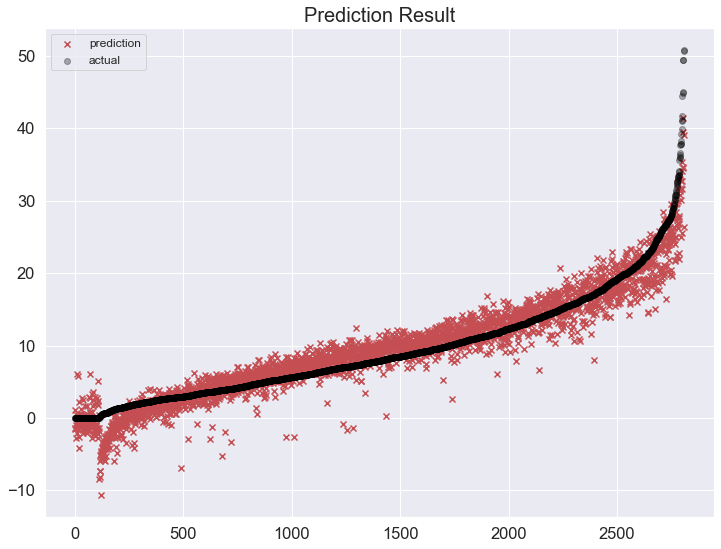

---------R square---------
0.9013654327001953
---------MSE---------
5.390024842407622
---------RMSE---------
2.321642703433847


In [16]:
def result(X_train, y_train):
    # 유의성 검정
    X_train3 = sm.add_constant(X_train)
    model3 = sm.OLS(y_train, X_train3).fit()
    print(model3.summary())

    
def eval(X, y, pred):
    # 예측 결과 시각화
    df = pd.DataFrame({'actual': y, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)
    print("---------actual vs predict---------")
    print(df.head())
    
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.3, marker='o', color='black')
    plt.title("Prediction Result", fontsize=20)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
    
    # R square: 분산 기반 예측 성능 평가, 1에 가까울수록 정확도 높음
    print("---------R square---------")
    print(lr_train.score(X, y))
    
    # MSE: 실제 값과 예측값의 차이를 제곱 후 평균을 구함
    print("---------MSE---------")
    print(mean_squared_error(y, pred))
    
    # RMSE: MSE값에 루트를 씌움
    print("---------RMSE---------")
    print(sqrt(mean_squared_error(y, pred)))
    
# 유의성 검정
result(X_train, y_train)

# train set 평가
eval(X_train, y_train, train_pred)

# test set 평가
eval(X_test, y_test, pred)


In [17]:
# 시각화 결과 결측치로 인해 위와 같은 결과가 나왔음을 확인할 수 있음
# 예측값이 실제 선과 유사하게 그려졌음을 알 수 있음
# y값이 0인 경우를 모두 제거하고 학습시키면 어떤 결과가 나올지 궁금하여 
idx = scaled_aq[scaled_aq['C6H6(GT)']==0].index
scaled_aq2 = scaled_aq.drop(idx)
scaled_aq2 = scaled_aq2.reset_index()

# 줄어든 데이터의 수 확인
# scaled_aq2.shape

In [18]:
# 데이터 쪼개기2
x_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','NOx(GT)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

X2 = scaled_aq2.loc[:, x_cols]
y2 = scaled_aq2.loc[:, 'C6H6(GT)']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [19]:
lr_train2 = lr_reg.fit(X_train2, y_train2)

train_pred2 = lr_reg.predict(X_train2)
pred2 = lr_train.predict(X_test2)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     5909.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:25:09   Log-Likelihood:                -13728.
No. Observations:                6293   AIC:                         2.748e+04
Df Residuals:                    6280   BIC:                         2.757e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -148.3443      3.585    -41.382

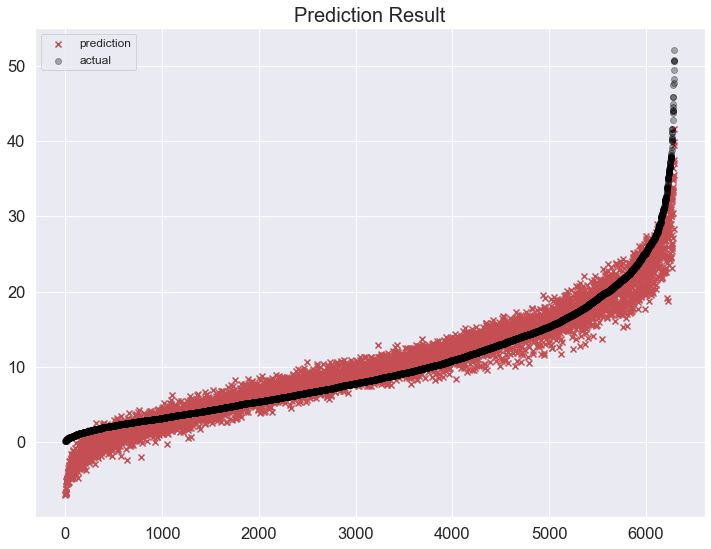

---------R square---------
0.9186461917673349
---------MSE---------
4.595004125359226
---------RMSE---------
2.1435960732748196
---------actual vs predict---------
     actual  prediction
0  0.181525   -6.510274
1  0.267172   -5.771040
2  0.270028   -6.295575
3  0.274336   -5.876227
4  0.283040   -5.820185


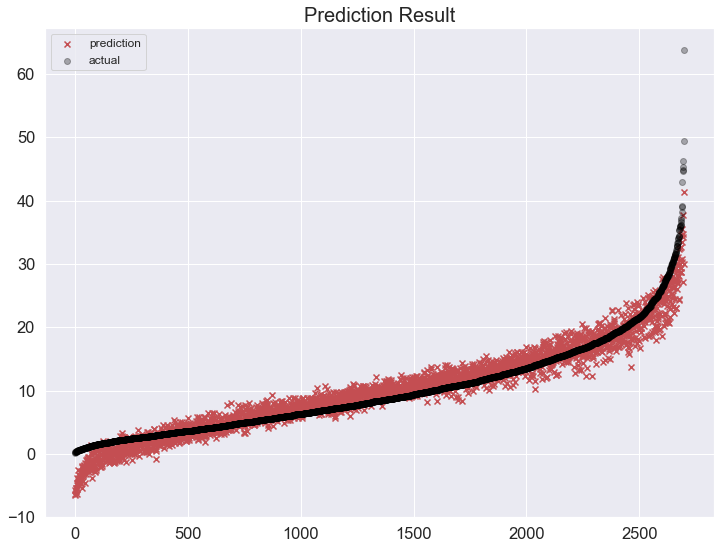

---------R square---------
0.9164886731270846
---------MSE---------
4.440948966315207
---------RMSE---------
2.107355918281297


In [20]:
# 유의성 검정
result(X_train2, y_train2)

# train set 평가
eval(X_train2, y_train2, train_pred2)

# test set 평가
eval(X_test2, y_test2, pred2)

In [21]:
# P-value를 확인했을 때, 절대습도 값이 유의하지 않은 것으로 나타남
# 이를 제외하고 한번 더 돌려봄

# 데이터 쪼개기3
x_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)','NOx(GT)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH']

X3 = scaled_aq2.loc[:, x_cols]
y3 = scaled_aq2.loc[:, 'C6H6(GT)']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3)

In [22]:
lr_train3 = lr_reg.fit(X_train3, y_train3)

train_pred3 = lr_reg.predict(X_train3)
pred3 = lr_train.predict(X_test3)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     6366.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:25:12   Log-Likelihood:                -13721.
No. Observations:                6293   AIC:                         2.747e+04
Df Residuals:                    6281   BIC:                         2.755e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -145.2292      3.548    -40.938

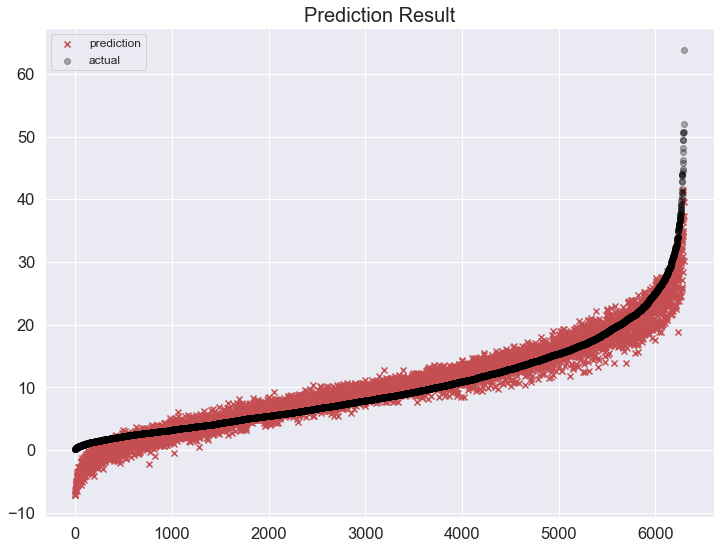

---------R square---------
0.9176840046822569
---------MSE---------
4.585014125560783
---------RMSE---------
2.1412646089544336
---------actual vs predict---------
     actual  prediction
0  0.164946   -6.865313
1  0.171968   -6.816147
2  0.224131   -6.327662
3  0.242052   -6.916366
4  0.270028   -6.374630


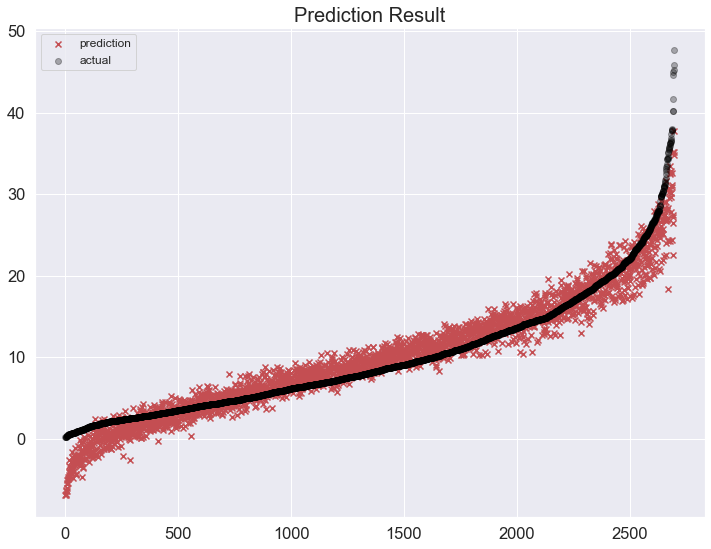

---------R square---------
0.9186193895873758
---------MSE---------
4.474946195993389
---------RMSE---------
2.115406862991937


In [23]:
# 유의성 검정
result(X_train3, y_train3)

# train set 평가
eval(X_train3, y_train3, train_pred3)

# test set 평가
eval(X_test3, y_test3, pred3)

In [24]:
# 0 근처의 데이터들이 음수의 값이 많이 찍혀있는 것을 보아 결측치의 영향을 많이 받았을 것으로 추정됨
# 따라서 결측치가 많았던 "NMHC(GT)"를 제거하고 다시한번 학습시킴
# 데이터 쪼개기4
x_cols = ['CO(GT)', 'PT08.S1(CO)','NOx(GT)',
       'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH']

X4 = scaled_aq2.loc[:, x_cols]
y4 = scaled_aq2.loc[:, 'C6H6(GT)']

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3)

In [25]:
lr_train4 = lr_reg.fit(X_train4, y_train4)

train_pred4 = lr_reg.predict(X_train4)
pred4 = lr_train.predict(X_test4)

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     7141.
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:25:14   Log-Likelihood:                -13658.
No. Observations:                6293   AIC:                         2.734e+04
Df Residuals:                    6282   BIC:                         2.741e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -142.4416      3.292    -43.263

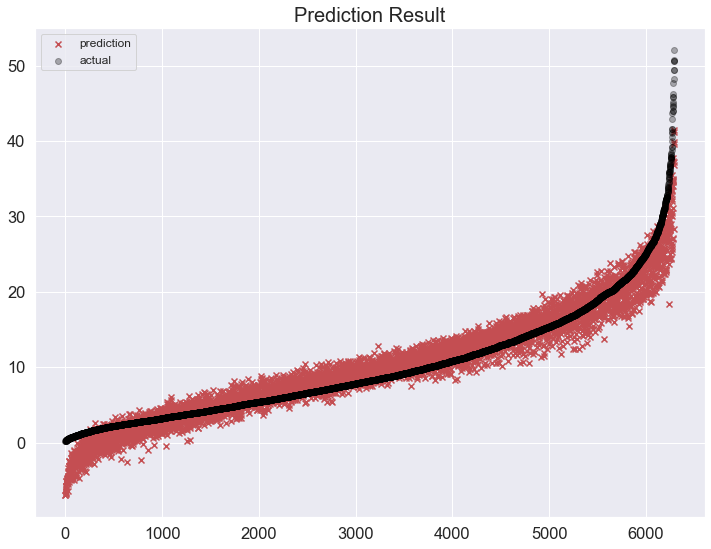

---------R square---------
0.9191372944852564
---------MSE---------
4.494092594593532
---------RMSE---------
2.119927497485122
---------actual vs predict---------
     actual  prediction
0  0.164946   -6.597570
1  0.181525   -6.806740
2  0.181525   -6.465373
3  0.270028   -6.198805
4  0.296313   -6.188884


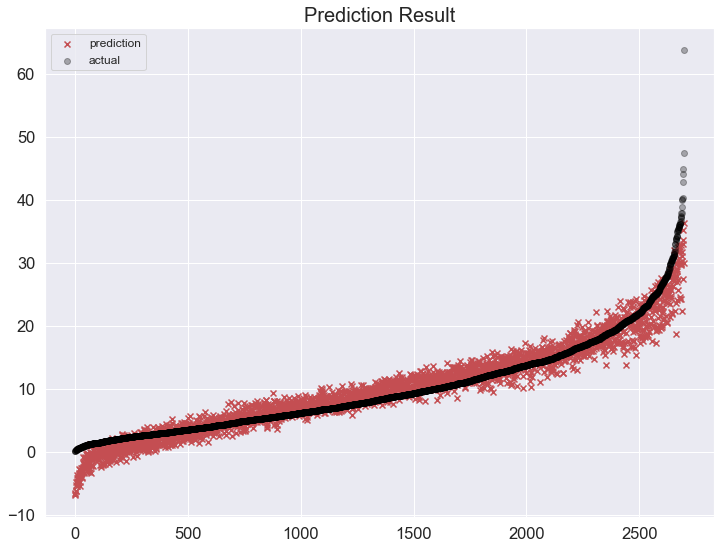

---------R square---------
0.9148757935217716
---------MSE---------
4.706298825458916
---------RMSE---------
2.1694005682351323


In [26]:
# 유의성 검정
result(X_train4, y_train4)

# train set 평가
eval(X_train4, y_train4, train_pred4)

# test set 평가
eval(X_test4, y_test4, pred4)

In [27]:
# "NMHC(GT)"의 경우에는 큰 영향을 주진 않았으나 오차가 좀 더 작아졌음을 확인할 수 있었음

## 최종 결론
- 다른 변수들을 통한 벤젠 농도 예측의 경우 꽤 좋은 설명력을 보여주고 있음
- 오차가 엄청 큰편은 아니나 결측치를 구체적으로 처리했다면 더 작은 오차를 보일 수 있었을 것임
- 추가적으로 차량 이동량, 풍량, 풍속, 대기오염물질 배출 시설의 시간당 배출량과 배출물질 등의 데이터가 있었다면 더 나은 결과물이 나올 수 있었을 것임
- 이를 통해 대기오염물질 측정 시 결측치가 생기는 경우 예측하여 채울 수 있을 것으로 판단됨